In [1]:
#Import the data cleaning library
import numpy as np
import pandas as pd
#import the data visulisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocessing matrics
from sklearn.preprocessing import LabelEncoder,MaxAbsScaler,MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

#Remove the warning
import warnings
warnings.filterwarnings("ignore")

**Load the dataset**

In [2]:
#Load the dataset 
credit_score1=pd.read_csv("credi_t test.csv")
credit_score2=pd.read_csv("credict_train.csv")


# Merging dataset

In [3]:
data = len(credit_score1)
df =  pd.concat(objs=[credit_score1, credit_score2], axis=0).reset_index(drop=True)

#Print the first five rows of dataset 
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,NaN
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,NaN
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997,NaN
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634,NaN
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,NaN


# DataPreprocessing

**Explore the each column**

In [4]:
#Check the data set row and coumns 
df.shape

(150000, 28)

In [5]:
#Check the datatype of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        150000 non-null  object 
 1   Customer_ID               150000 non-null  object 
 2   Month                     150000 non-null  object 
 3   Name                      135000 non-null  object 
 4   Age                       150000 non-null  object 
 5   SSN                       150000 non-null  object 
 6   Occupation                150000 non-null  object 
 7   Annual_Income             150000 non-null  object 
 8   Monthly_Inhand_Salary     127500 non-null  float64
 9   Num_Bank_Accounts         150000 non-null  int64  
 10  Num_Credit_Card           150000 non-null  int64  
 11  Interest_Rate             150000 non-null  int64  
 12  Num_of_Loan               150000 non-null  object 
 13  Type_of_Loan              132888 non-null  o

In [6]:
#Check the ratio of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,127500.0,4190.115139,3180.489657,303.645417,1625.265833,3091.000000,5948.454596,15204.633333
Num_Bank_Accounts,150000.0,17.006940,117.069476,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,150000.0,22.623447,129.143006,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,150000.0,71.234907,461.537193,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,150000.0,21.063400,14.860154,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,147000.0,28.529014,194.456058,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,150000.0,32.283309,5.113315,20.000000,28.054731,32.297058,36.487954,50.000000
Total_EMI_per_month,150000.0,1432.513579,8403.759977,0.000000,30.947775,71.280006,166.279555,82398.000000


**Handling the missing data**

In [7]:
#Check the missing values
print("Percentage of missing value is \n")
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Percentage of missing value is 



Credit_Score                33.333333
Monthly_Inhand_Salary       15.000000
Type_of_Loan                11.408000
Name                        10.000000
Credit_History_Age           9.000000
Num_of_Delayed_Payment       7.000000
Amount_invested_monthly      4.500000
Num_Credit_Inquiries         2.000000
Monthly_Balance              1.174667
Changed_Credit_Limit         0.000000
Payment_Behaviour            0.000000
Total_EMI_per_month          0.000000
Payment_of_Min_Amount        0.000000
Credit_Utilization_Ratio     0.000000
Outstanding_Debt             0.000000
Credit_Mix                   0.000000
ID                           0.000000
Customer_ID                  0.000000
Num_of_Loan                  0.000000
Interest_Rate                0.000000
Num_Credit_Card              0.000000
Num_Bank_Accounts            0.000000
Annual_Income                0.000000
Occupation                   0.000000
SSN                          0.000000
Age                          0.000000
Month       

In [8]:
#Remove the irrelavent columns which can not provide the more information for predict the credict the score
df.drop(["ID","SSN","Name"],axis=1,inplace=True)

In [9]:
#Fill the numerical columns
imputer=SimpleImputer()

for i in df.select_dtypes(include="float64").columns:
    df[i]=df[i].fillna(df[i].median())
    #impute=imputer.fit_transform(df[[i]])

#Fill the misssing value of categorical or object
for object in df.select_dtypes(include="object").columns:
    df[object]=df[object].fillna(df[object].mode()[0])
    
#Check the missing values    
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Customer_ID                 0.0
Payment_Behaviour           0.0
Amount_invested_monthly     0.0
Total_EMI_per_month         0.0
Payment_of_Min_Amount       0.0
Credit_History_Age          0.0
Credit_Utilization_Ratio    0.0
Outstanding_Debt            0.0
Credit_Mix                  0.0
Num_Credit_Inquiries        0.0
Changed_Credit_Limit        0.0
Monthly_Balance             0.0
Num_of_Delayed_Payment      0.0
Type_of_Loan                0.0
Num_of_Loan                 0.0
Interest_Rate               0.0
Num_Credit_Card             0.0
Num_Bank_Accounts           0.0
Monthly_Inhand_Salary       0.0
Annual_Income               0.0
Occupation                  0.0
Age                         0.0
Month                       0.0
Delay_from_due_date         0.0
Credit_Score                0.0
dtype: float64

In [10]:
#Check the deuplicat element
df.duplicated().sum()

0

**Remove the underscore from data**

In [11]:
# #Claen the columns all

def clean_number(number):
    try:
        # Ensure the number is a string
        number_str = str(number)
        # Remove the underscore and convert to float
        cleaned_number = float(number_str.replace('_', ''))
        return cleaned_number
    except ValueError:
        # If conversion fails, return the original number
        return number

# Apply the function to all elements of the DataFrame
df_cleaned = df.applymap(clean_number)


In [12]:
import pandas as pd

# Assuming df is your DataFrame
# Define the function to clean numbers
def clean_number(number):
    try:
        # Ensure the number is a string
        number_str = str(number)
        # Remove the underscore and convert to float
        cleaned_number = float(number_str.replace('_', ''))
        return cleaned_number
    except ValueError:
        # If conversion fails, return the original number
        return number

# List of columns that are of type object and should be cleaned
# columns_to_clean= ["Age",'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
#                     'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_History_Age', 
#                     'Monthly_Balance', 'Credit_Score',"Amount_invested_monthly"]
                    

columns_to_clean=['Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       ]
# Apply the clean_number function to the specified columns
for column in columns_to_clean:
    df[column] = df[column].apply(clean_number)

print(df.dtypes)  # Check the data types after cleaning

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object


# Handling Outliers

In [13]:
df.select_dtypes(include="number")

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,2022.0,809.98,35.030402,49.574949,236.642682,186.266702
1,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,4.0,809.98,33.053114,49.574949,21.465380,361.444004
2,24.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,4.0,809.98,33.811894,49.574949,148.233938,264.675446
3,24.0,19114.12,3091.000000,3.0,4.0,3.0,4.0,4.0,5.0,4.0,809.98,32.430559,49.574949,39.082511,343.826873
4,28.0,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,5.0,605.03,25.926822,18.816215,39.684018,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,3.0,502.38,34.663572,35.104023,60.971333,479.866228
149996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,3.0,502.38,40.565631,35.104023,54.185950,496.651610
149997,25.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,27.0,6.0,3.0,502.38,41.255522,35.104023,24.028477,516.809083
149998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,19.0,3.0,502.38,33.638208,35.104023,251.672582,319.164979


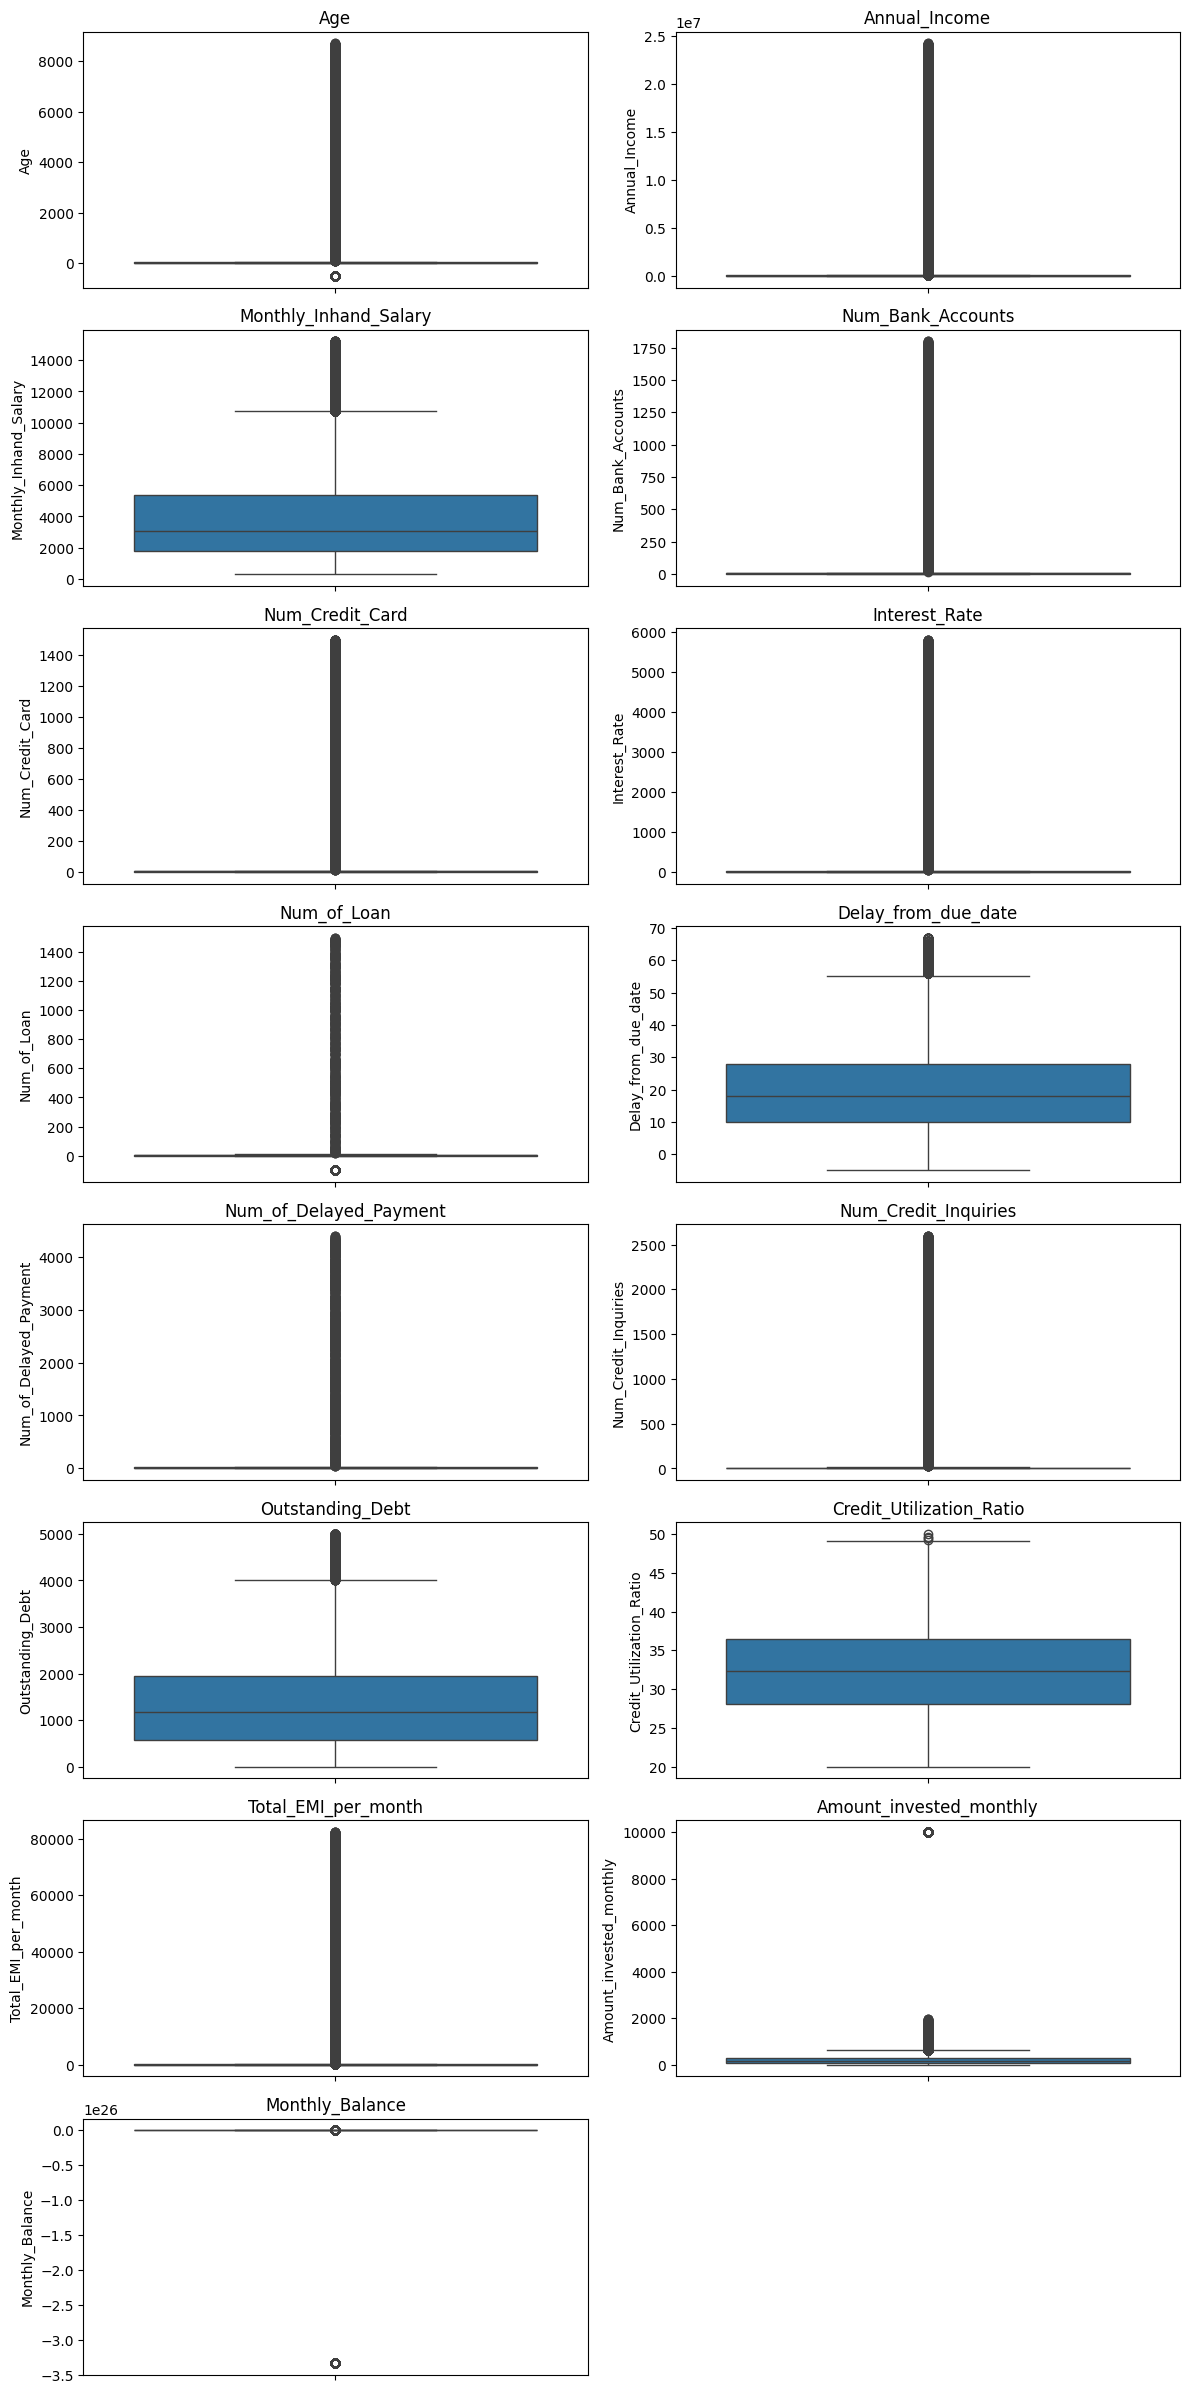

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include="number").columns
num_plots = len(num_cols)
rows = (num_plots // 2) + (num_plots % 2)

plt.figure(figsize=(12, rows * 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [15]:
# # #create a function to remove the outlier by quantile method 
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    Lower_Outlier=q1-1.5*IQR
    Upper_Outlier=q3+1.5*IQR
    return Lower_Outlier,Upper_Outlier

for i in df.select_dtypes(include="number"):
    Lower_Outlier,upperoutier=wisker(df[i])
    df[i]=np.where(df[i]<Lower_Outlier,Lower_Outlier,df[i]) #If less than lower outlier then fill it Lower_Outlier or as it
    df[i]=np.where(df[i]>upperoutier,upperoutier,df[i])

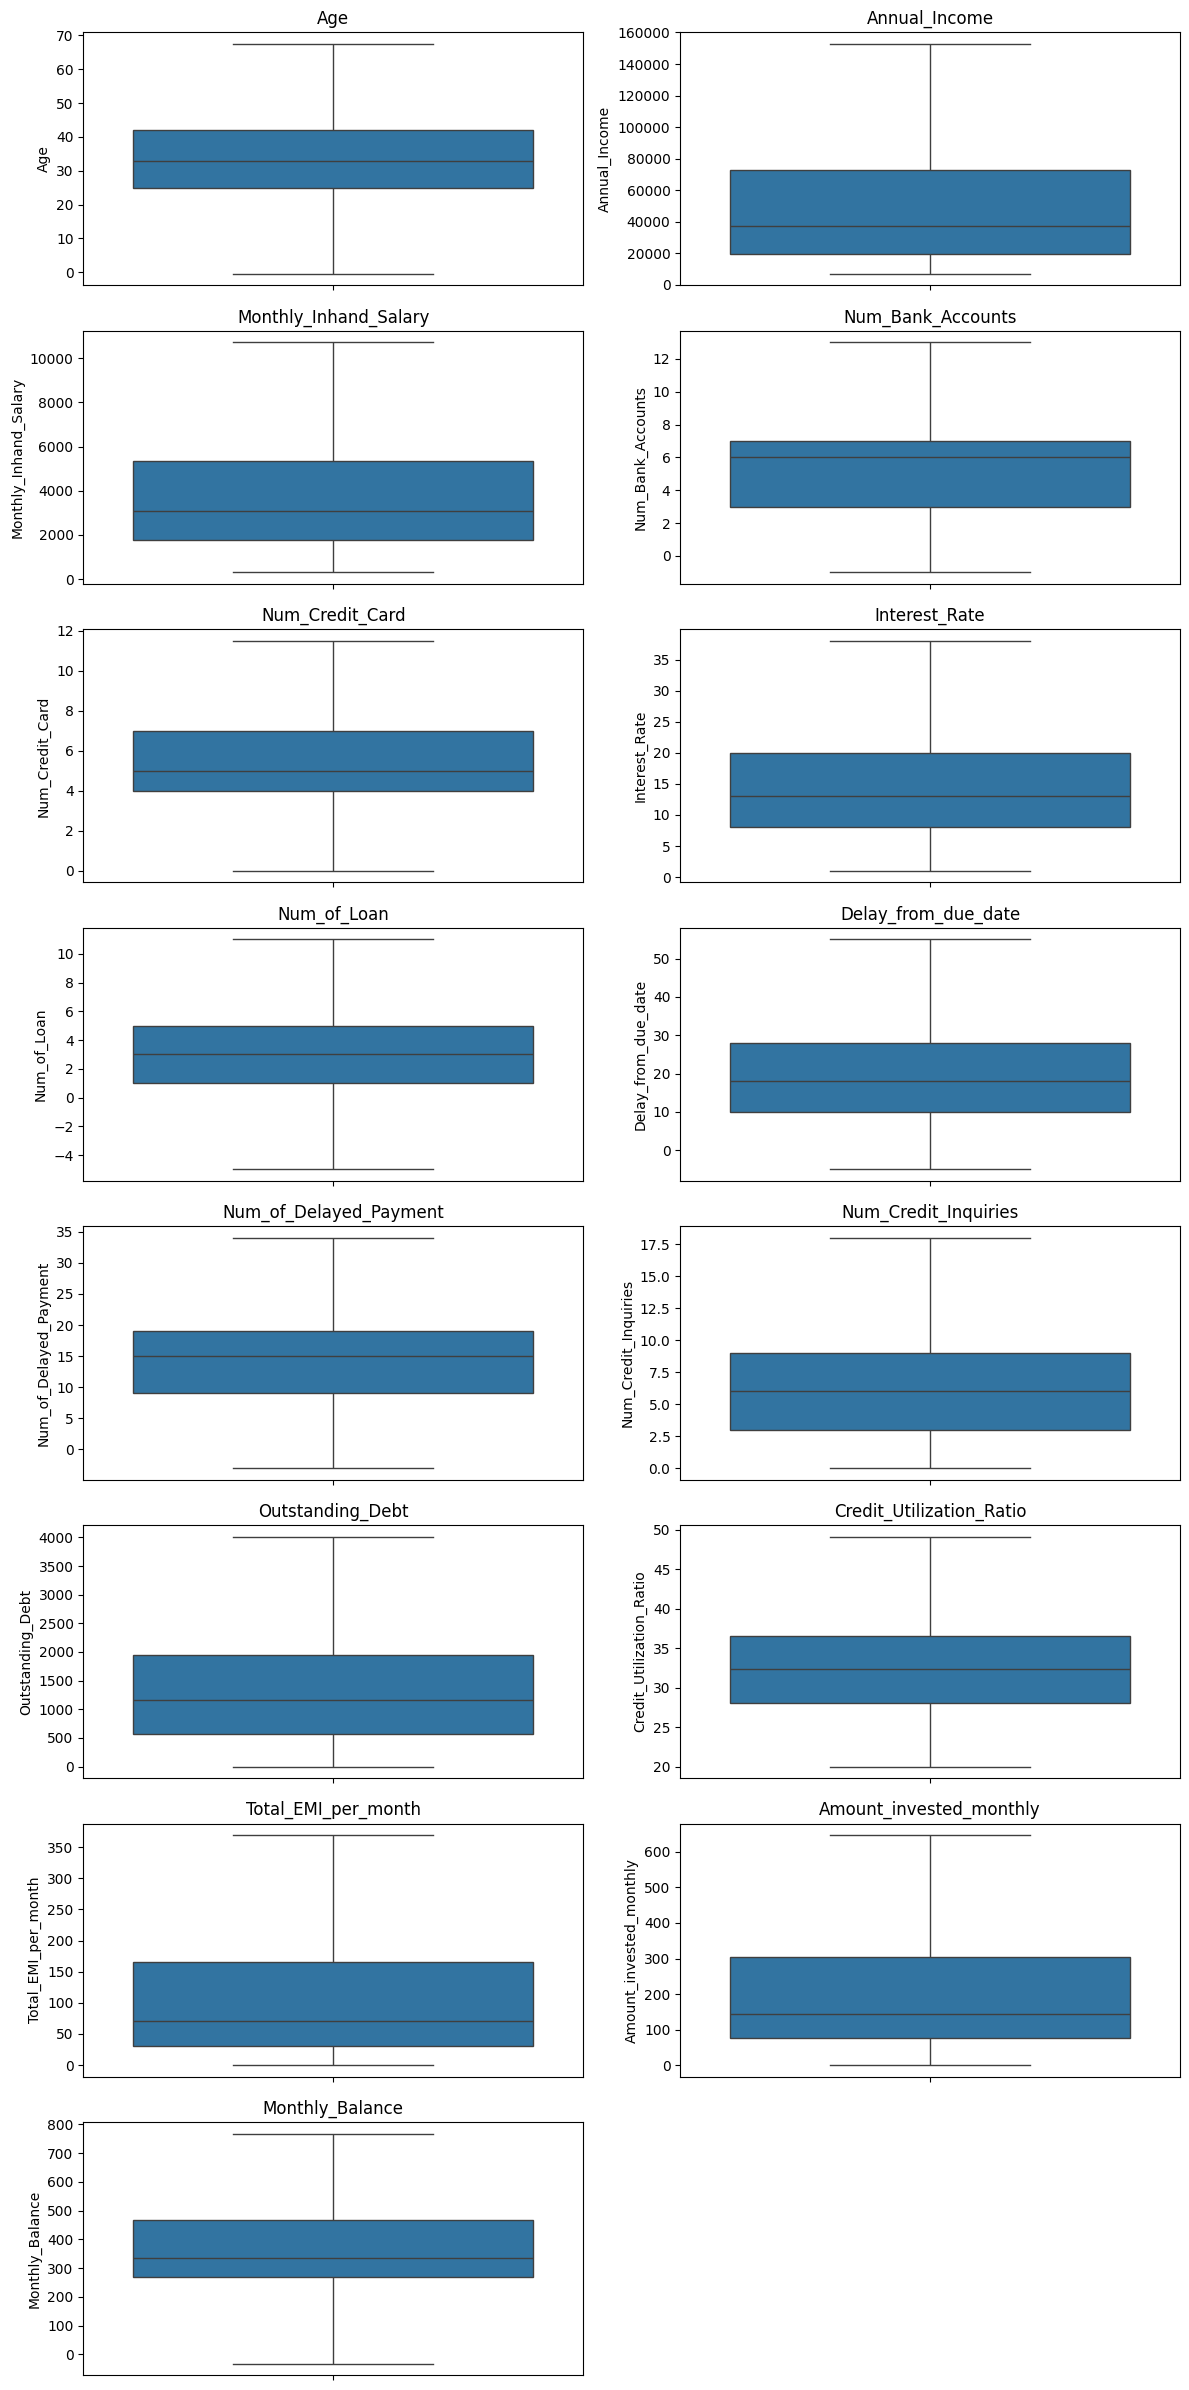

In [16]:
#Check the outliers are removed
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df.select_dtypes(include="number").columns
num_plots = len(num_cols)
rows = (num_plots // 2) + (num_plots % 2)

plt.figure(figsize=(12, rows * 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


**Scale the data**

In [17]:
# #Scaling the dataset
# for i in df.select_dtypes(include="float64").columns:
#     df[i]=StandardScaler().fit_transform(df[[i]])
    
# df.head(2)

In [19]:
#Label Encoder on categorical column
# for i in cate:
#         df[i]=LabelEncoder().fit_transform(df[i])

**Exploring data analysis (EDA)**

In [20]:
#Explore the each column of data

In [21]:
#Check the unique value of Credict score
df['Credit_Score'].value_counts()

Credit_Score
Standard    103174
Poor         28998
Good         17828
Name: count, dtype: int64

In [ ]:
#Plot the 'Credit_Score' column
sns.barplot(x="Credit_Score")

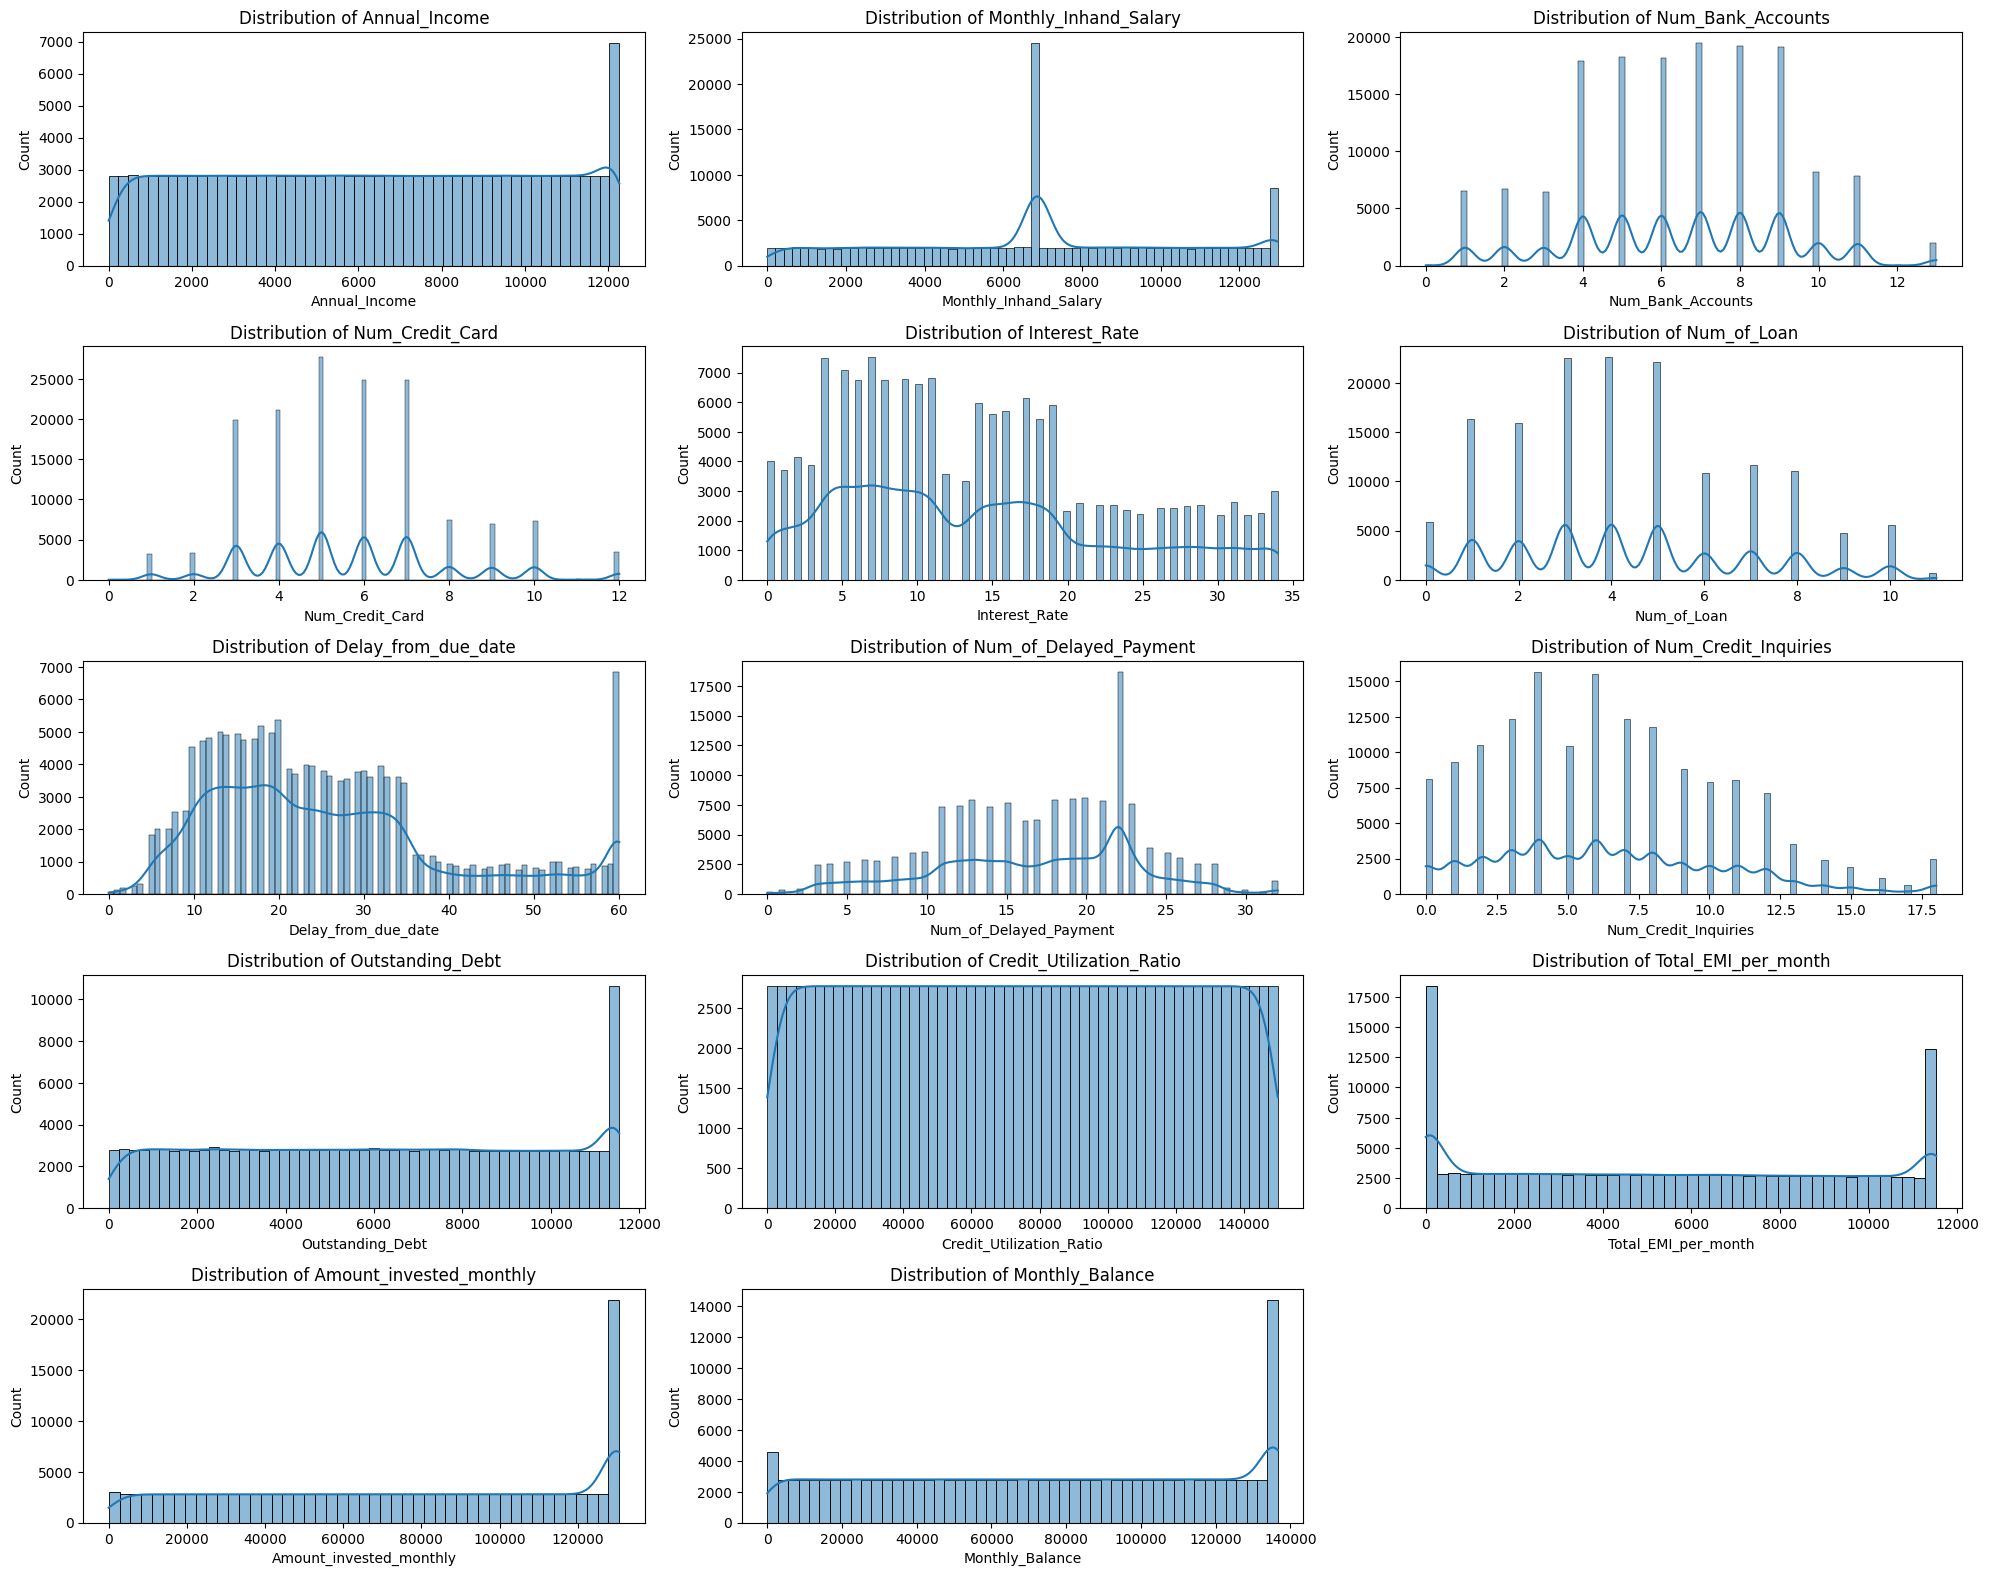

In [34]:
#Feature Distributions of every columns by histogram 

# Set up the matplotlib figure
plt.figure(figsize=(20,28))

# # Plot distributions
for i, title in enumerate(df.select_dtypes(include="number").columns[1:-1], 1):
    plt.subplot(9, 3, i)
    sns.histplot(df[title], kde=True)
    plt.title(f'Distribution of {title}')

plt.tight_layout()
plt.show()

In [22]:
# Set up the matplotlib figure
plt.figure(figsize=(20,28))

# # Plot distributions
for i, title in enumerate(df.select_dtypes(include="number").columns[1:-1], 1):
    plt.subplot(9, 3, i)
    sns.countplot(df[title])
    plt.title(f'Distribution of {title}')

plt.tight_layout()
plt.show()

**Encoding the data**

In [ ]:
for i in df.select_dtypes(include="number"):
    df[i]=LabelEncoder().fit_transform(df[i])
    
df["Credit_Score"]=LabelEncoder().fit_transform(df["Credit_Score"])

**Apply Machine Learning Model**

accuracy_score  1.0
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3610
           1       1.00      1.00      1.00      5783
           2       1.00      1.00      1.00     20607

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



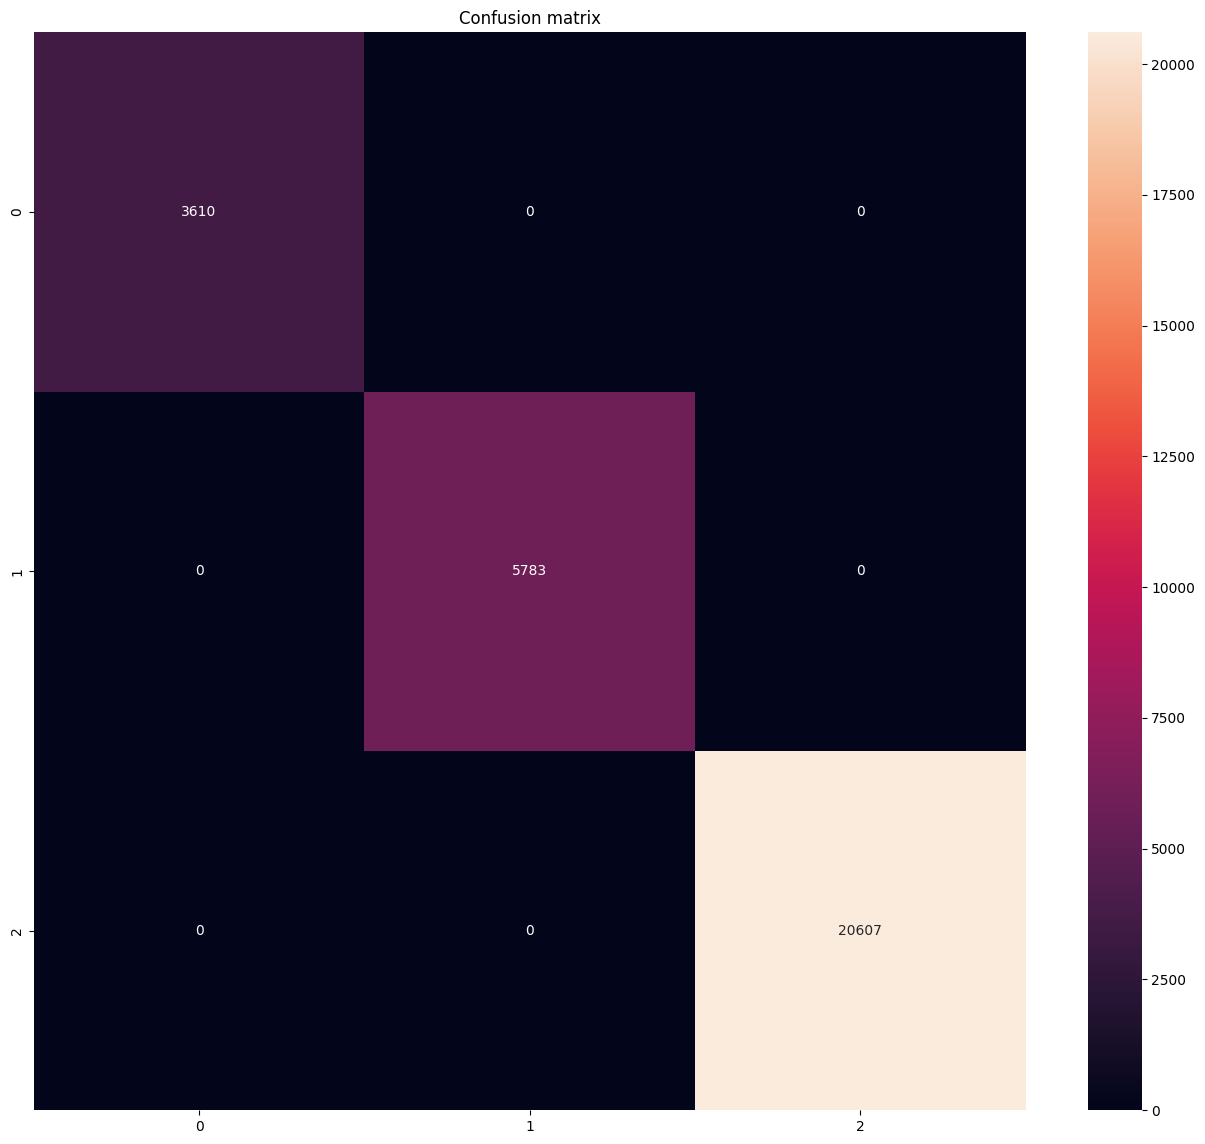

In [27]:

#Separate the target and feature value
X=df.select_dtypes(include="number")
#X=df.drop("Credit_Score",axis=1)
Y=df["Credit_Score"]

#Train Test and split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

#Create the model
model=XGBClassifier()
#Fit the model
model.fit(X_train,Y_train)
#Predict the model
Y_pred=model.predict(X_test)
    
print("accuracy_score ",accuracy_score(Y_test,Y_pred))
print("classification_report \n",classification_report(Y_test,Y_pred))

#Draw the confusion matrix
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='d')
plt.title("Confusion matrix")
plt.show()

In [21]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,12320,11,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,35.030402,22 Years and 9 Months,1,49.574949,236.642682,6,186.266702,Standard
1,12320,10,24.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,33.053114,22 Years and 10 Months,1,49.574949,21.465380,2,361.444004,Standard
2,12320,9,24.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,1,809.98,33.811894,17 Years and 11 Months,1,49.574949,148.233938,5,264.675446,Standard
3,12320,2,24.0,12,19114.12,3091.000000,3.0,4.0,3.0,4.0,...,1,809.98,32.430559,23 Years and 0 Months,1,49.574949,39.082511,2,343.826873,Standard
4,1066,11,28.0,15,34847.84,3037.986667,2.0,4.0,6.0,1.0,...,1,605.03,25.926822,27 Years and 3 Months,1,18.816215,39.684018,1,485.298434,Standard
